# Figure 5

All plots in the manuscript are done with DPI = 600. In the jupyter notebook I changed it to *200*


# Packages required

Run it all at the same time to get the plots # Packages

In [84]:

from scipy.integrate import odeint, solve_ivp, lsoda
from scipy.optimize import minimize
from scipy.optimize import curve_fit
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns



import scipy.optimize
from matplotlib.ticker import FormatStrFormatter
import matplotlib.ticker as tkr
import scipy.stats as st
from scipy.stats import scoreatpercentile



import glob

def significance_stars(p_value):
    if p_value < 0.001:
        return '***'
    elif p_value < 0.01:
        return '**'
    elif p_value < 0.05:
        return '*'
    else:
        return 'ns'

# Asthetics

In [85]:
colors = [  "#56B4E9", "#009E73", "#CC79A7", "#999999", "#E69F00","#DB2B39", "#0076A1", "#0072B2", "#1A5042","#0C1713", "#6A6969"]
palette = sns.color_palette(colors)
n = 1.

sns.set_theme(context='notebook', style='ticks', font='Arial', 
              font_scale=1.3, 
              rc={"lines.linewidth": n, 'axes.linewidth':n, 
                                  "xtick.major.width":n,"ytick.major.width":n}, 
              palette = palette)
sns.color_palette(colors)

[(0.33725490196078434, 0.7058823529411765, 0.9137254901960784),
 (0.0, 0.6196078431372549, 0.45098039215686275),
 (0.8, 0.4745098039215686, 0.6549019607843137),
 (0.6, 0.6, 0.6),
 (0.9019607843137255, 0.6235294117647059, 0.0),
 (0.8588235294117647, 0.16862745098039217, 0.2235294117647059),
 (0.0, 0.4627450980392157, 0.6313725490196078),
 (0.0, 0.4470588235294118, 0.6980392156862745),
 (0.10196078431372549, 0.3137254901960784, 0.25882352941176473),
 (0.047058823529411764, 0.09019607843137255, 0.07450980392156863),
 (0.41568627450980394, 0.4117647058823529, 0.4117647058823529)]

# Figure 5B

In [86]:
b = pd.read_csv("Figure5B_Plate_reader.csv")

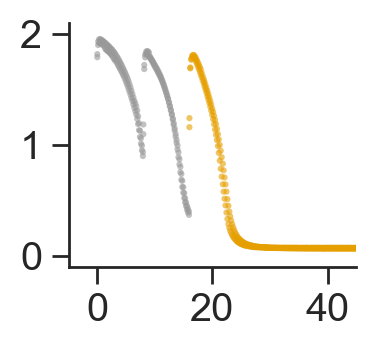

In [87]:
fig, ax = plt.subplots(figsize = (2.15,2), dpi = 200)

sns.scatterplot(data = b.query("Cycle == 0")
                , x = "Time", y = "value", ax = ax, 
                color = "C3", edgecolor = "none", s = 5, alpha = .6)
sns.scatterplot(data = b.query("Cycle == 1")
                , x = "Time", y = "value", ax = ax, 
                color = "C3", edgecolor = "none", s = 5, alpha = .6)
sns.scatterplot(data = b.query("Cycle == 2")
                , x = "Time", y = "value", ax = ax, 
                color = "C4", edgecolor = "none", s = 5, alpha = .6)


sns.despine(fig, left=False, bottom=False)
ax.set(xlabel = "", ylabel = "", xticks = np.linspace(0, 40, 3), yticks = np.linspace(0, 2, 3), ylim = (-0.1, 2.1),xlim =  (-5, 45))
#ax.axvline(x = 8, ls = "--", lw = .3, c = "black")
#ax.axvline(x = 16, ls = "--", lw = .3, c = "black")

plt.tight_layout()

# Figure 5C

In [88]:
c = pd.read_csv("Figure5C_Plate_reader.csv")


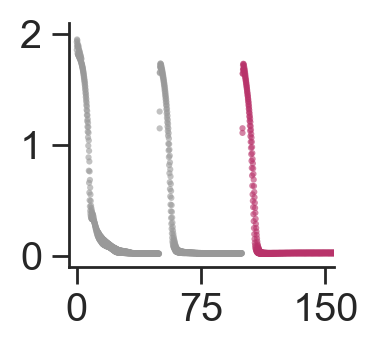

In [89]:
fig, ax = plt.subplots(figsize = (2.15,2), dpi = 200)

sns.scatterplot(data = c.query("Cycle == 0")
                , x = "Time", y = "value", ax = ax, 
                color = "C3", edgecolor = "none", s = 5, alpha = .6)
sns.scatterplot(data = c.query("Cycle == 1")
                , x = "Time", y = "value", ax = ax, 
                color = "C3", edgecolor = "none", s = 5, alpha = .6)
sns.scatterplot(data = c.query("Cycle == 2")
                , x = "Time", y = "value", ax = ax, 
                color = "#B8336A", edgecolor = "none", s = 5, alpha = .6)


sns.despine(fig, left=False, bottom=False)
ax.set(xlabel = "", ylabel = "", xticks = np.linspace(0, 150, 3), yticks = np.linspace(0, 2, 3), ylim = (-0.1, 2.1),xlim =  (-5, 155))
#ax.axvline(x = 8, ls = "--", lw = .3, c = "black")
#ax.axvline(x = 16, ls = "--", lw = .3, c = "black")

plt.tight_layout()

# Figure 5D

In [90]:
d = pd.read_csv("Figure5D_Lifetimes.csv") # Cycle 2 is the third cycle. I always start counting from 0.
d

,Lt,Refuel_time,Type,Cycle
0,8.250000,50min,Seed,2
1,10.066667,50min,Seed,2
2,15.033333,8min,Seed,2
3,14.366667,8min,Seed,2


/var/folders/tx/jcz7yt1s7tdg8h231t9g2zx40000gn/T/ipykernel_99145/1290563535.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set(yticks = np.linspace(0, 16, 3), xlabel = "", ylabel = "", ylim=(0, 16), xticklabels=[""], xticks=(), yticklabels=[])


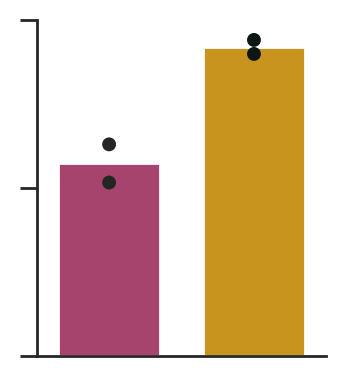

In [91]:
fig, ax = plt.subplots(figsize = (2.,2.15), dpi = 200)


sns.swarmplot(data = d.query("Type == 'Seed'"), x = "Refuel_time", y = "Lt", 
              palette='dark:#0C1713', legend=False, ax = ax, hue = "Refuel_time", s = 5,
              dodge=False)

 
sns.barplot(data = d.query("Type == 'Seed'"), x = "Refuel_time", y = "Lt",
             hue = "Refuel_time", 
             legend=False, 
             ax = ax, 
             dodge=None, 
             errorbar=None,  width=.7, palette= [ "#B8336A","C4",]) 

ax.set(yticks = np.linspace(0, 16, 3), xlabel = "", ylabel = "", ylim=(0, 16), xticklabels=[""], xticks=(), yticklabels=[])

sns.despine()
plt.tight_layout()

In [92]:
import pingouin as pg
from pingouin import anova

 


In [93]:

def significance_stars(p_value):
    if p_value < 0.001:
        return '***'
    elif p_value < 0.01:
        return '**'
    elif p_value < 0.05:
        return '*'
    else:
        return 'ns'


In [94]:
a = pg.pairwise_tests(data=d, dv='Lt', between='Refuel_time').round(6)
a["Significance"] = a['p-unc'].apply(significance_stars)
a

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges,Significance
0,Refuel_time,50min,8min,False,True,-5.727441,2.0,two-sided,0.029158,2.682,-3.272823,*


# Figure 5E

In [95]:
e = pd.read_csv("Figure5E_product_distribution.csv")


In [96]:

import matplotlib as mpl

def colorFader(c1, c2, mix=0):
    c1 = np.array(mpl.colors.to_rgb(c1))
    c2 = np.array(mpl.colors.to_rgb(c2))
    return tuple((1 - mix) * c1 + mix * c2)

def gradientFader(c1, c2, n):
    n = n-1
    gradient = []
    for x in range(n + 1):
        gradient.append(colorFader(c1, c2, x / n))
    return gradient



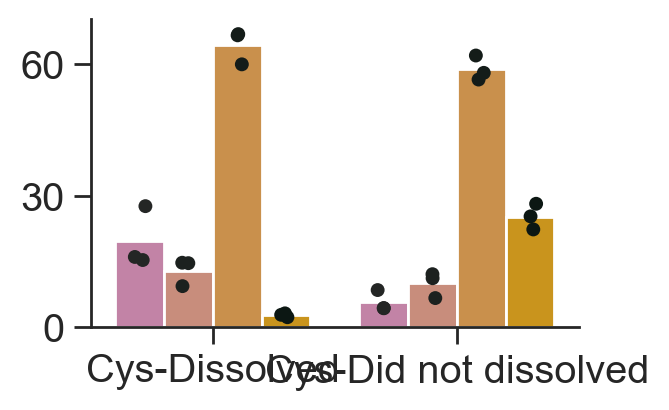

In [97]:
c1 = 'C2'
c2 = 'C4'

gradient = gradientFader(c1, c2, n = 4)

o = ['Cys-Dissolved', 'Cys-Did not dissolved', ]
fig, ax = plt.subplots(figsize = (3.15,2), dpi = 200)
sns.despine(fig, top = True, right = True)

sns.stripplot(data = e, x = "C", y = "value", palette='dark:#0C1713', hue = "variable", dodge=True, size = 5, 
              order = o)

sns.barplot(data = e, x = "C", y = "value", errorbar=None, hue = "variable", palette=gradient, width=.8, order = o)

ax.set(xlabel="", ylabel="", 
           yticks=np.linspace(0, 60, 3), 
           )
plt.legend([], frameon = False)

# Figure 5F

In [98]:
f = pd.read_csv("Figure5F_Error_Rate.csv")
f

,Unnamed: 0,Type,Azide1,Azide2,variable,value,C,ER
0,0,Did not dissolved,Cys,LysArg,ER,0.318867,Cys-Did not dissolved,31.886723
1,1,Did not dissolved,Cys,LysArg,ER,0.325385,Cys-Did not dissolved,32.538493
2,2,Did not dissolved,Cys,LysArg,ER,0.318484,Cys-Did not dissolved,31.848356
3,3,Dissolved,Cys,LysArg,ER,0.539626,Cys-Dissolved,53.962570
4,4,Dissolved,Cys,LysArg,ER,0.474343,Cys-Dissolved,47.434350
5,5,Dissolved,Cys,LysArg,ER,0.481640,Cys-Dissolved,48.164009


/var/folders/tx/jcz7yt1s7tdg8h231t9g2zx40000gn/T/ipykernel_99145/3206686312.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set(yticks = np.linspace(0, 60, 3), xlabel = "", ylabel = "", ylim=(0, 60), xticklabels=[""], xticks=(), yticklabels=[])


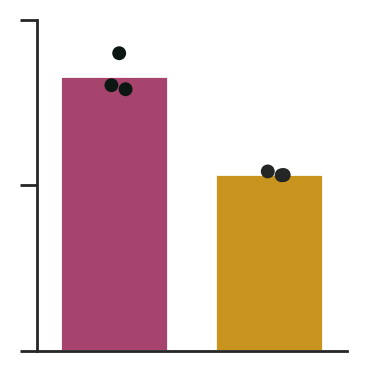

In [99]:
# Example usage:
c1 = 'C2'
c2 = 'C4'

gradient = gradientFader(c1, c2, n = 4)

o = ['Cys-Dissolved', 'Cys-Did not dissolved', ]

fig, ax = plt.subplots(figsize = (2.,2.15), dpi = 200)

sns.despine(fig, top = True, right = True)

sns.stripplot(data = f, x = "C", y = "ER", palette='dark:#0C1713', hue = "C", dodge=False, size = 5, 
              order = o)

sns.barplot(data = f, x = "C", y = "ER", errorbar=None, hue = "C",  width=.7, order = o, dodge = False, palette= ["C4", "#B8336A",])

ax.set(yticks = np.linspace(0, 60, 3), xlabel = "", ylabel = "", ylim=(0, 60), xticklabels=[""], xticks=(), yticklabels=[])

plt.legend([], frameon = False)

In [100]:
import pingouin as pg
from pingouin import anova

 

def significance_stars(p_value):
    if p_value < 0.001:
        return '***'
    elif p_value < 0.01:
        return '**'
    elif p_value < 0.05:
        return '*'
    else:
        return 'ns'


In [101]:
a = pg.pairwise_tests(data=f, dv='ER', between='C').round(6)
a["Significance"] = a['p-unc'].apply(significance_stars)
a

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges,Significance
0,C,Cys-Did not dissolved,Cys-Dissolved,False,True,-8.550586,4.0,two-sided,0.001027,22.376,-5.585219,**
